In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import sys
sys.path.insert(0, '/home/bryanb/setigen')
import setigen as stg

sys.path.insert(0, '/home/bryanb/bl-scint-analysis')
import blscint
# from blscint import *

import numpy as np

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [2]:
%matplotlib inline

In [3]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024
obs_length = 600
desired_y_px = 64

max_dt = obs_length / desired_y_px

chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength

int_factor = int(max_dt * df)

dt = int_factor / df

[0.72752348 0.26254211]
[0.584562  0.0058841]


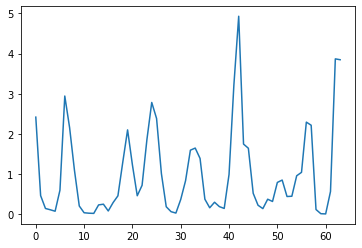

In [4]:
frame = stg.Frame(fchans=256,
              tchans=desired_y_px,
              df=df,
              dt=dt)

p = 2
tscint = 20

rho = blscint.get_rho(frame.ts, tscint, p)
print(rho)

num_signals = 1
Z = blscint.build_Z(rho, frame.tchans * num_signals)
Y = blscint.get_Y(Z)
print(blscint.autocorrelation(Y, p+1)[1:])

plt.plot(Y)
plt.show()

[0.92383423 0.72669121]
[0.76169051 0.27810777]


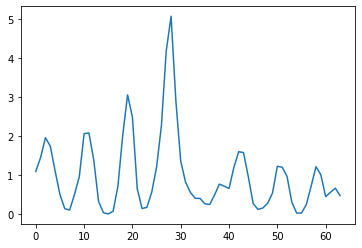

In [5]:
frame = stg.Frame(fchans=256,
                  tchans=desired_y_px*2,
                  df=df,
                  dt=dt/2)

p = 2
tscint = 20

rho = blscint.get_rho(frame.ts, tscint, p)
print(rho)

num_signals = 1
Z = blscint.build_Z(rho, frame.tchans * num_signals)
Y = blscint.get_Y(Z)

Y = np.mean(np.reshape(Y, (len(Y)//2, 2)), axis=1)

print(blscint.autocorrelation(Y, p+1)[1:])

plt.plot(Y)
plt.show()

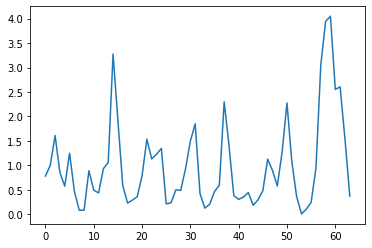

In [7]:
frame = stg.Frame(fchans=256,
                  tchans=desired_y_px,
                  df=df,
                  dt=dt)

p = 2
tscint = 20

Y = blscint.get_time_series(tscint, frame, num_samples=frame.tchans)

plt.plot(Y)
plt.show()

9.305762474666667
[0.96530301 0.86985137]


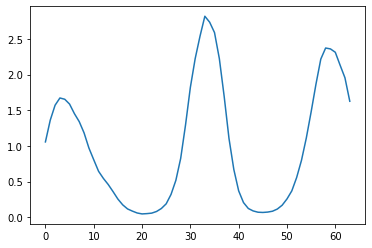

In [22]:
frame = stg.Frame(fchans=256,
                  tchans=desired_y_px,
                  df=df,
                  dt=dt)
print(dt)

p = 2
tscint = 80

Y = blscint.get_time_series(tscint, frame, num_samples=frame.tchans)
print(blscint.autocorrelation(Y, p+1)[1:])

plt.plot(Y)
plt.show()